# EDA on Women's Clothing Review Data

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import pandas_profiling
%matplotlib inline
import nltk
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv", index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


# EDA - What can you Explore?
- what age gives what type of rating?
- What are recommended in each Division, Class, department of Clothes?
- Which age group gives more comments/ratings on what type of clothes?
- Rating vs Positive feedback count
- Lengthy Reviews for what type of cloth?
- Positive/Negative Reviews for what type of clothes?
- Positive reviews by what age?



## What age group has given what types of Ratings?

Text(0.5,1,'Age Distribution in Data')

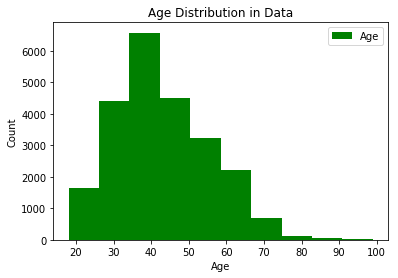

In [5]:
# The age distribution in data
plt.hist(df['Age'], color="green", label = "Age")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution in Data")

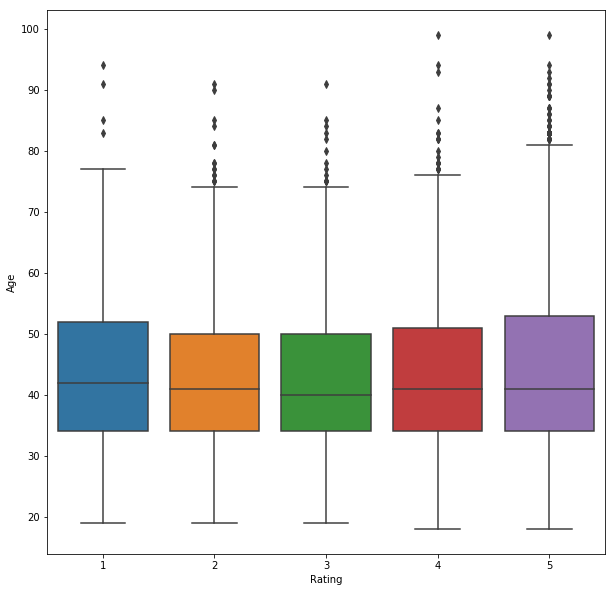

In [6]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Age', data = df)

## What are Recommended Clothes item?

In [9]:
print(df['Division Name'].unique())
print(df['Department Name'].unique())
print(df['Class Name'].unique())

['Initmates' 'General' 'General Petite' nan]
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan]
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises']


In [71]:
rd = df[df['Recommended IND'] == 1] # recommended
nrd = df[df['Recommended IND'] == 0] # not recommended
rd.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Lenth,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,303
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,192
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,496,496


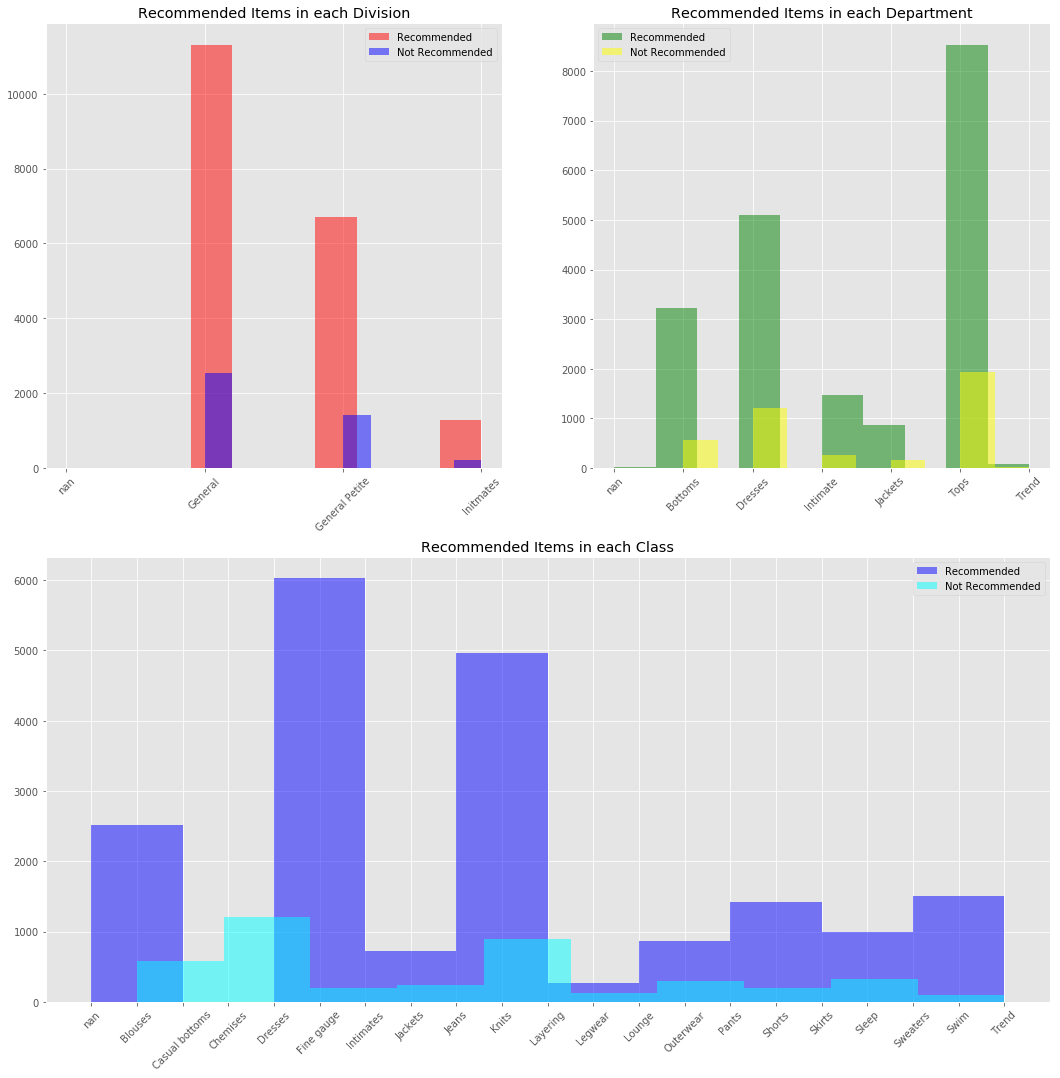

In [72]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = plt.hist(rd['Division Name'], color = "red", alpha = 0.5, label = "Recommended")
ax1 = plt.hist(nrd['Division Name'], color = "blue", alpha = 0.5, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Division")
ax1 = plt.legend()

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = plt.hist(rd['Department Name'], color="green", alpha = 0.5, label = "Recommended")
ax2 = plt.hist(nrd['Department Name'], color="yellow", alpha = 0.5, label = "Not Recommended")
ax2 = plt.title("Recommended Items in each Department")
ax2 = plt.legend()

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = plt.hist(rd['Class Name'], color="blue", alpha = 0.5, label = "Recommended")
ax3 = plt.hist(nrd['Class Name'], color="cyan", alpha = 0.5, label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Class")
ax3 = plt.legend()

# Which age group gives what length of comments on what type of clothes?

In [30]:
df['Review Length'] = df['Review Text'].astype(str).apply(len)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review Lenth,Review Length
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,53
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,303
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,500
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,124
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,192


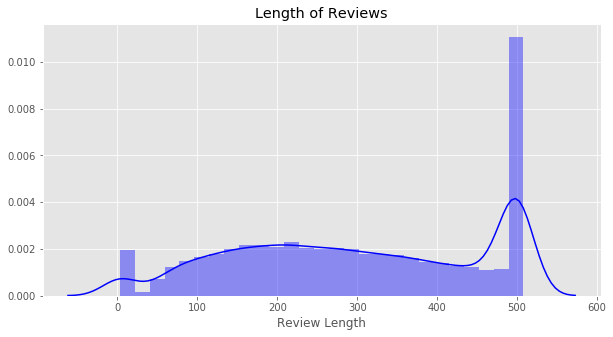

In [47]:
fig = plt.figure(figsize=(10, 5))
#ax1 = plt.hist(df['Review Length'], color = "red", bins = 20)
ax = sns.distplot(df['Review Length'], color="blue")
ax = plt.title("Length of Reviews")

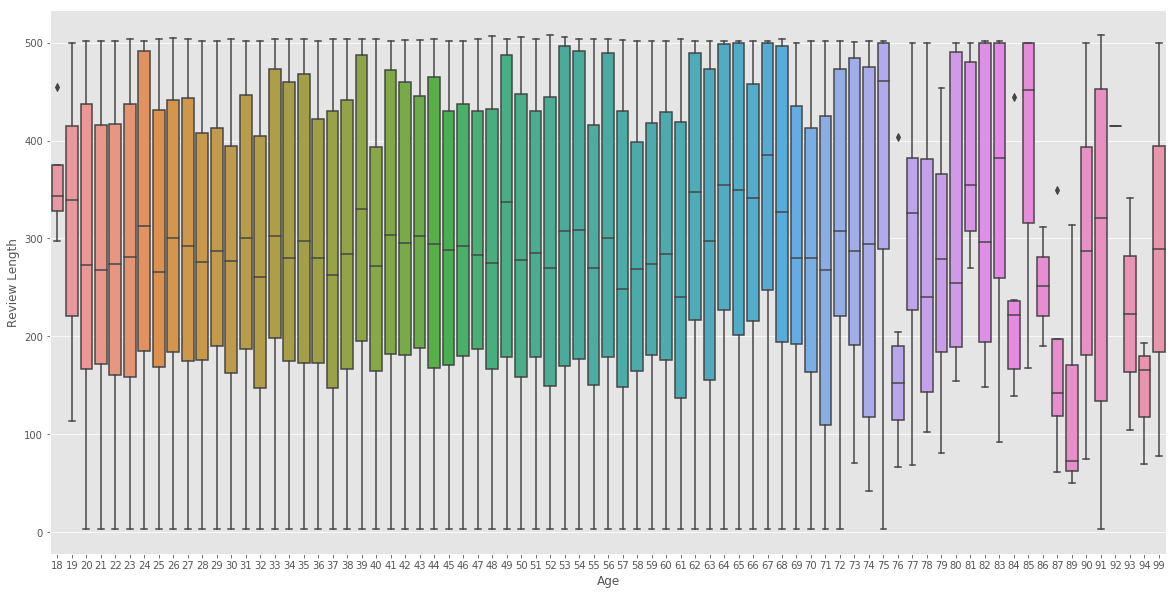

In [45]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Age', y = 'Review Length', data = df)

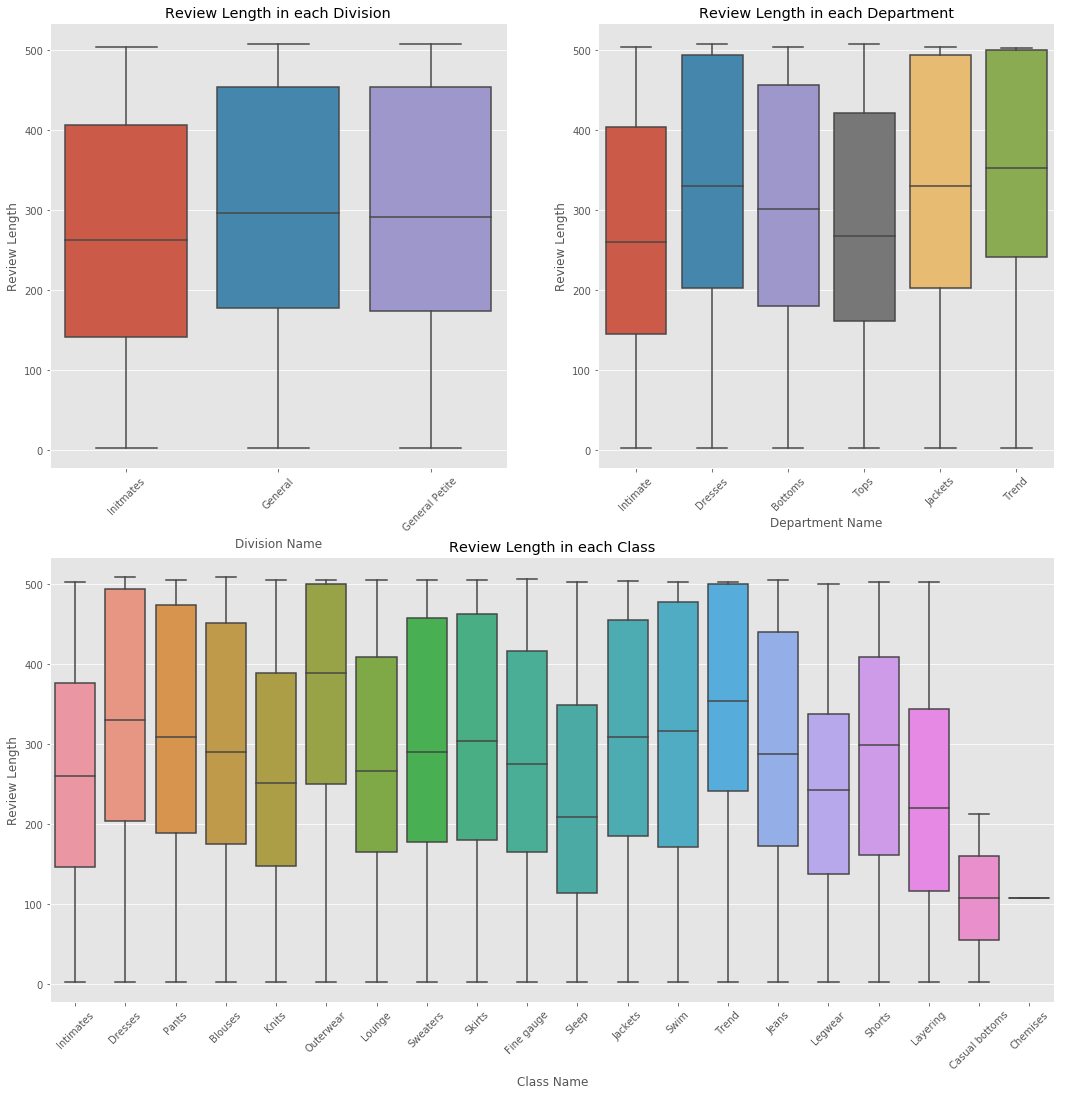

In [54]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 18))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.boxplot(x = 'Division Name', y = 'Review Length', data = df)
ax1 = plt.title("Review Length in each Division")

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.boxplot(x = 'Department Name', y = 'Review Length', data = df)
ax2 = plt.title("Review Length in each Department")

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.boxplot(x = 'Class Name', y = 'Review Length', data = df)
ax3 = plt.title("Review Length in each Class")

# Ratings vs. Positive Feedback Count

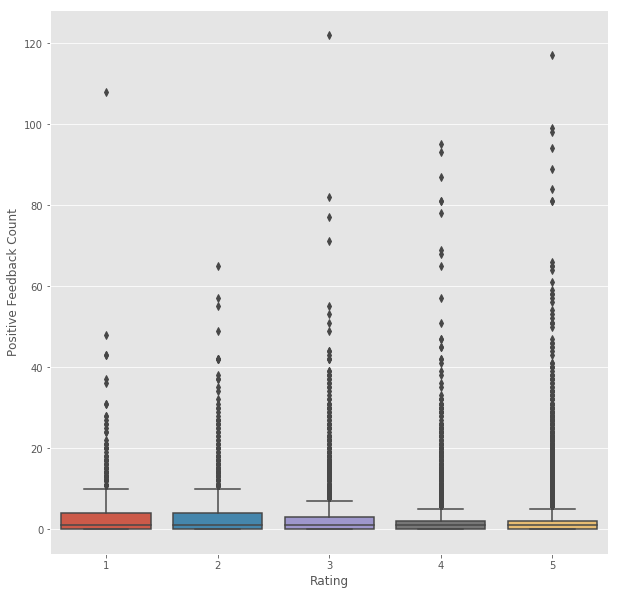

In [55]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Rating', y = 'Positive Feedback Count', data = df)

# NLTK Analysis

In [97]:
Reviews = df['Review Text']
print(Reviews.shape)
Reviews[Reviews.isnull()] = "NULL"
Reviews[Reviews.isnull() == True]

(23486,)


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Series([], Name: Review Text, dtype: object)

In [100]:
R_split = []
for i in range(len(Reviews)):
    x = word_tokenize(Reviews[i])
    R_split.append(x)
R_split[3]

LookupError: 
**********************************************************************
  Resource 'tokenizers/punkt/PY3/english.pickle' not found.
  Please use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - '/Users/kratisaxena/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************